In [2]:
%matplotlib inline
import math
import numpy as np
import random
import matplotlib.pyplot as plt

def rect(row):
    r = row[0]
    theta = row[1]
    x = r * math.cos(theta)
    y = 0
    z = r * math.sin(theta)
    return np.array([x,y,z])


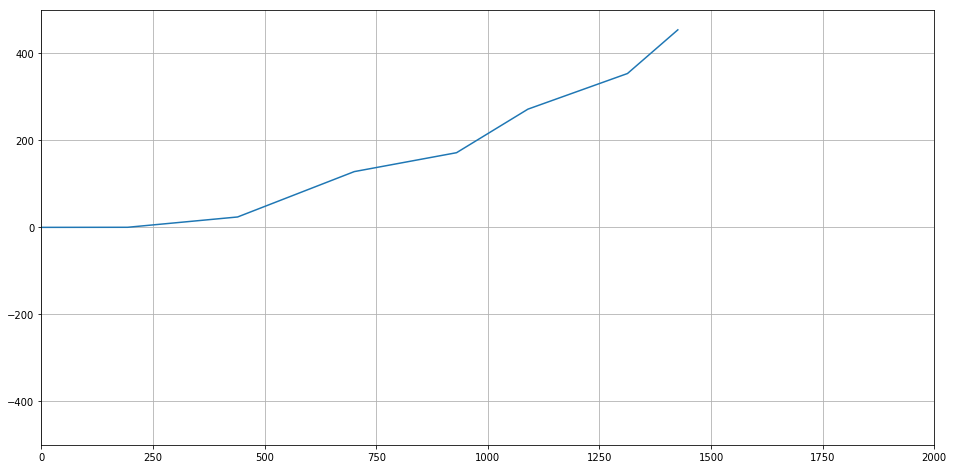

In [29]:
nsteps = 1000
poisson_lambda = 150

rg = np.array(range(nsteps))
velocity = np.zeros(nsteps)
heading = np.zeros(nsteps)

velocity[0] = 1.25
heading[0] = 0

change = np.cumsum(np.random.poisson(poisson_lambda, 10))

for i in range(1,nsteps):
  velocity[i] = velocity[i-1]
  heading[i] = heading[i-1]

  if i in change:
    velocity[i] += random.choice([-1,1]) * random.uniform(-0.5,0.5)
    heading[i] += random.choice([-1,1]) * random.uniform(-math.pi/8,math.pi/8)

trajectory_polar = np.vstack((velocity,heading)).transpose()
targets = np.apply_along_axis(rect, 1, trajectory_polar)


#targets[:,0].shape
xv = targets[:,0]
zv = targets[:,2]

xp = np.cumsum(xv)
zp = np.cumsum(zv)

plt.figure(figsize=(16, 8))
plt.axis([0, 2000, -500, 500])
plt.grid(True)
plt.plot(xp,zp)


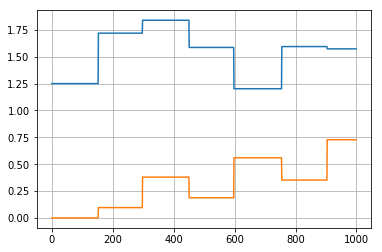

In [35]:
plt.grid(True)
plt.plot(velocity)
plt.plot(heading)

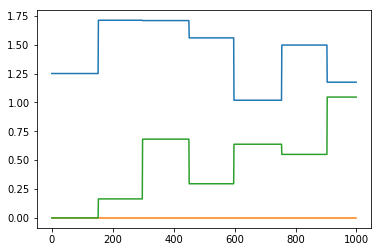

In [39]:
plt.plot(targets)